# DNA Sequencing

Here is a classification model that can predict a gene's function based on the DNA sequence of the coding sequence alone.

### Treating DNA sequence as a language known as  k-mer counting

A challenge that remains is that none of these above methods results in vectors of uniform length which is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

Take the long biological sequence and break it down into k-mer length overlapping “words”. 
In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. so, we will convert this sequence or say string k-mer words.
For example,"words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
human_data = pd.read_table('C:/Users/hp/Desktop/dna/human_data.txt')
chimp_data = pd.read_table('C:/Users/hp/Desktop/dna/chimp_data.txt')
dog_data = pd.read_table('C:/Users/hp/Desktop/dna/dog_data.txt')

In [3]:
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


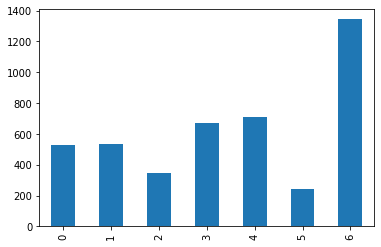

In [4]:
human_data['class'].value_counts().sort_index().plot.bar()

In [5]:
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


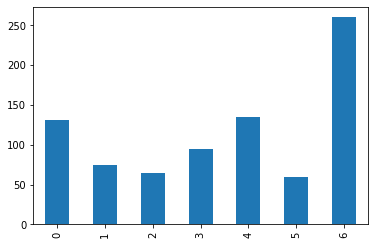

In [6]:
dog_data['class'].value_counts().sort_index().plot.bar()

In [7]:
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


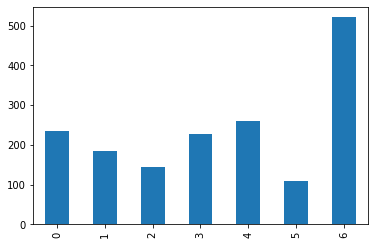

In [8]:
chimp_data['class'].value_counts().sort_index().plot.bar()

### Here, we are applying k-mers to the complete sequences.
Default size = 6 (hexamer words)


In [9]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [10]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [11]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [12]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values                         

In [13]:
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [14]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values                       
y_chimp

array([4, 4, 4, ..., 6, 3, 3], dtype=int64)

In [15]:
dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values 
y_dog

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

In [16]:
print(dog_texts[0])

atgcca tgccac gccaca ccacag cacagc acagct cagcta agctag gctaga ctagat tagata agatac gataca atacat tacatc acatcc catcca atccac tccacc ccacct cacctg acctga cctgat ctgatt tgattt gattta atttat tttatt ttatta tattat attata ttataa tataat ataatc taatct aatctt atcttt tctttt cttttc ttttca tttcaa ttcaat tcaata caatat aatatt atattt tatttc atttct tttctc ttctca tctcac ctcacc tcaccc caccct accctc ccctct cctctt ctcttc tcttca cttcat ttcatc tcatcc catcct atccta tcctat cctatt ctattt tatttc atttca tttcaa ttcaac tcaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaatt aaattt aatttc atttca tttcaa ttcaaa tcaaat caaatc aaatca aatcac atcact tcacta cactac actact ctacta tactac actacc ctaccc taccca acccag cccaga ccagaa cagaaa agaaaa gaaaac aaaacc aaaccc aacccg acccga cccgat ccgata cgataa gataac ataacc taacca aaccaa accaaa ccaaat caaatc aaatct aatctg atctgc tctgct ctgcta tgctaa gctaaa ctaaaa taaaat aaaatt aaattg aattgc attgct ttgctg tgctgg gctggt ctggtc tggtca ggtcaa gtcaac tcaaca caacat aacata acataa cataat ataatc

### Bag of Words

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [18]:
print(X.shape)

(4380, 232414)


In [19]:
print(X_dog.shape)

(820, 232414)


In [20]:
print(X_chimp.shape)

(1682, 232414)


Splitting the human dataset into the training set and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [23]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_chimp, 
                                                    y_chimp, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [24]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_dog, 
                                                    y_dog, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [25]:
print(X1_train.shape)
print(X1_test.shape)

(1345, 232414)
(337, 232414)


In [26]:
print(X2_train.shape)
print(X2_test.shape)

(656, 232414)
(164, 232414)


### A multinomial Naive Bayes Classifier 

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X1_train, y1_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [30]:
y_p = classifier.predict(X1_test)

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X2_train, y2_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [32]:
y_pp = classifier.predict(X2_test)

### Confusion matrix and Classification report

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cmatrix = confusion_matrix(y_test, y_pred)
cmatrix1 = confusion_matrix(y1_test, y_p)
cmatrix2 = confusion_matrix(y2_test, y_pp)

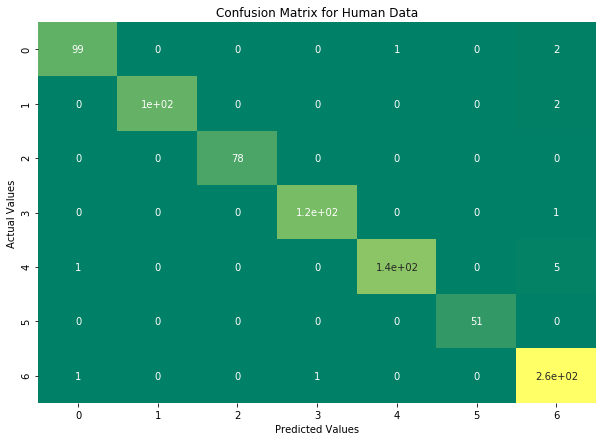

In [34]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cmatrix, annot=True,cmap='summer',cbar=False)
plt.title('Confusion Matrix for Human Data')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

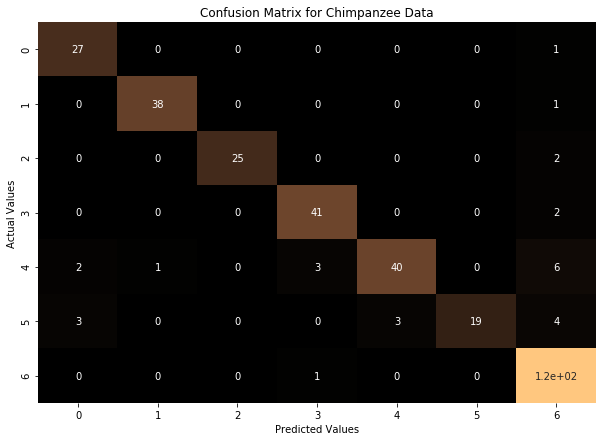

In [35]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cmatrix1, annot=True,cmap='copper',cbar=False)
plt.title('Confusion Matrix for Chimpanzee Data')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

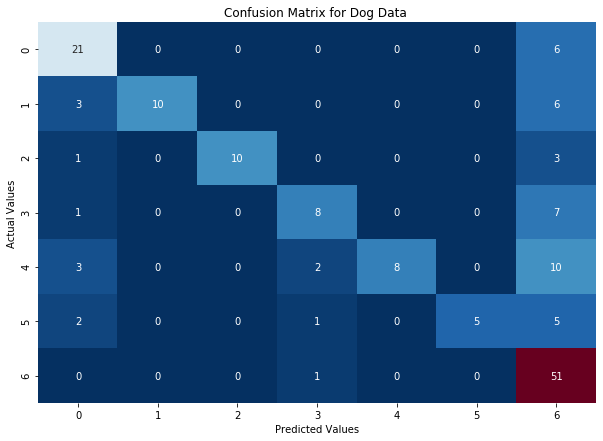

In [36]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cmatrix2, annot=True,cmap='RdBu_r',cbar=False)
plt.title('Confusion Matrix for Dog Data ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Human Data

In [37]:
acc = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy: {}%".format(acc))

Accuracy: 98.4%


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.99      0.96      0.98       149
           5       1.00      1.00      1.00        51
           6       0.96      0.99      0.98       265

    accuracy                           0.98       876
   macro avg       0.99      0.99      0.99       876
weighted avg       0.98      0.98      0.98       876



Chimpanzee Data

In [39]:
acc1 = round(accuracy_score(y1_test, y_p),4)*100
print("Accuracy: {}%".format(acc1))

Accuracy: 91.39%


In [40]:
print(classification_report(y1_test, y_p))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.97      0.97      0.97        39
           2       1.00      0.93      0.96        27
           3       0.91      0.95      0.93        43
           4       0.93      0.77      0.84        52
           5       1.00      0.66      0.79        29
           6       0.88      0.99      0.93       119

    accuracy                           0.91       337
   macro avg       0.93      0.89      0.90       337
weighted avg       0.92      0.91      0.91       337



Dog Data

In [41]:
acc2 = round(accuracy_score(y2_test, y_pp),4)*100
print("Accuracy: {}%".format(acc2))

Accuracy: 68.89999999999999%


In [42]:
print(classification_report(y2_test, y_pp))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       1.00      0.53      0.69        19
           2       1.00      0.71      0.83        14
           3       0.67      0.50      0.57        16
           4       1.00      0.35      0.52        23
           5       1.00      0.38      0.56        13
           6       0.58      0.98      0.73        52

    accuracy                           0.69       164
   macro avg       0.85      0.60      0.66       164
weighted avg       0.78      0.69      0.67       164

